 <div style="border:solid green 2px; padding: 20px">
<b>Привет, Екатерина!</b>

Меня зовут Марина К, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай мне знать, и мы перейдем на «вы». 

Ты проделала большую работу над проектом, но давай сделаем его еще лучше! Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления.  </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Так я выделяю все остальные комментарии, твои удачные решения, комментарии по твоим промежуточным выводам и даю подсказки, как можно улучшить твоё решение.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)

 <div style="border:solid green 2px; padding: 20px">
 Проект принят, удачи в следующих проектах! Оставила немного комментариев с пометкой V2.

# Описание проекта

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Хорошее начало :) Можно еще отдельно зафиксировать цель, добавить план проекта и сделать описание входных переменных. Так, читатель твоего проекта сразу сможет погрузиться в суть проекта. </div>

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from math import factorial

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Данные загружены, давай на них посмотрим.</div>

In [2]:

internet.info()
messages.info()
tariffs.info()
users.info()
calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_pe

In [3]:
#проверка на дубликаты
messages.duplicated().sum()

tariffs.duplicated().sum()

users.duplicated().sum()

calls.duplicated().sum()

0

In [4]:
print(calls.head(15))

         id   call_date  duration  user_id
0    1000_0  2018-07-25      0.00     1000
1    1000_1  2018-08-17      0.00     1000
2    1000_2  2018-06-11      2.85     1000
3    1000_3  2018-09-21     13.80     1000
4    1000_4  2018-12-15      5.18     1000
5    1000_5  2018-11-02      0.00     1000
6    1000_6  2018-10-18      0.00     1000
7    1000_7  2018-08-22     18.31     1000
8    1000_8  2018-09-15     18.44     1000
9    1000_9  2018-08-15      0.00     1000
10  1000_10  2018-08-22      5.03     1000
11  1000_11  2018-05-28     18.82     1000
12  1000_12  2018-07-05      2.02     1000
13  1000_13  2018-09-29      7.15     1000
14  1000_14  2018-12-11      9.13     1000


<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Верное решение использовать info(), но выводы немного слились. Стоит добавить строки-разделители. Можно также попробовать сделать вывод таблиц в цикле для большей автоматизации процесса. </div>

Данные по 500 пользователям, пропущенных значений нет, кроме тех, о которых говорится в тз - дата прекращения пользования тарифом. Пропущенное значение здесь означает, что на момент выгрузки данных тариф еще действовал.

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>Стоит еще сразу проверить каждую таблицу на наличие дубликатов. Добавь, пожалуйста :)</s>

Perfect :)
</div>

<div class="alert alert-info"> fixed:)</div>

## Шаг 2. Подготовьте данные

In [5]:
#округлим значения длительности звонков
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype('int')
#округлим значение интернет-сессий
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
#приведем все столбцы с датами к нужному формату
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])


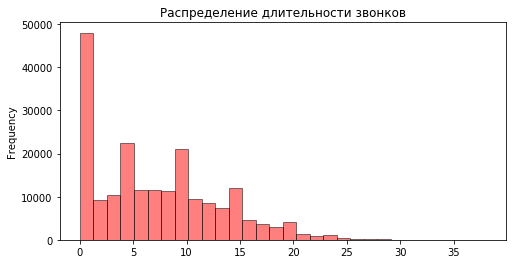

In [6]:
plt.figure(figsize =(8, 4))
plt.title('Распределение длительности звонков')
hist = calls['duration'].plot(kind='hist', bins=(30),         
                alpha=0.5, 
                ec='black',
                color='red')
plt.show()


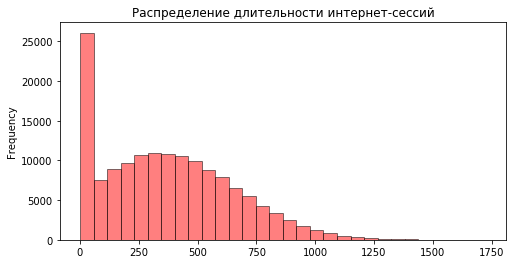

In [7]:
plt.figure(figsize =(8, 4))
plt.title('Распределение длительности интернет-сессий')
hist = internet['mb_used'].plot(kind='hist', bins=(30),         
                alpha=0.5, 
                ec='black',
                color='red')
plt.show()


Большое количество нулей в длительности звонков и объеме трафика. Со звонками понятно - могут быть пропущенные, сброшенные и так далее. Если человек в принципе трубку не взял - то есть не проговорил и секунды, - то и стоимости такие звонки иметь не будут. То же самое и с объемом трафика. 
Но так как мы в объеме трафика и длительности звонков сделали округление в большую сторону, то есть звонки длительностью в секунду у нас стали минутой, то оставшиеся нули - определенно точно не стоили ни копейки.
В этом случае не вижу смысла их обрабатывать. **поправьте меня, если не права в выводах, в таком случае подобные строки можно просто удалить**

<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> Теперь замечаний нет. Нам важно было рассмотреть распределения звонков и интернет-сессий, чтобы знать, с какими данными мы работаем. Ты абсолютно верно отметила, что далее при агрегировании наши нули никак не повлияют на расчеты, поэтому можно их удалить или просто оставить.</div>

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>Здесь еще (после округления) необходимо посмотреть на распределения длительности звонков и интернет-сессий. Построй гистограммы и опиши аномалии, которые ты обнаружила. Прокомментируй, откуда могли взяться такие данные, и как мы будем их обрабатывать.
    
Еще, по условиям тарифа необходимо сделать округление для интернет-сессий (используй аналогичный метод и также приведи после этого к целочисленному типу).    
    Уверена, у тебя это не займет много времени :) </s></div>

<div class="alert alert-info"> добавила распределение и вывод, насколько легитимный - не знаю:)</div>

In [8]:
#функция для просчитывания значений по месяцам для каждого пользователя
def count_for_month(data, datetime, index, values, func):
    data['month'] = data[datetime].dt.month
    pivot = data.pivot_table(index = [index,'month'], values = values, aggfunc = func, fill_value = 0)
    pivot=pivot.reset_index()
    return pivot

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Все верно, нам нужна группировка по двум столбцам user_id и месяцу. </div>

In [9]:
#применим функцию к таблицам с необходимыми данными и соответствующими операциями - суммой и подсчетом
calls_count = count_for_month(calls, 'call_date', 'user_id' ,'duration', 'sum')
messages_count = count_for_month(messages, 'message_date', 'user_id' ,'message_date', 'count')
internet_count = count_for_month(internet, 'session_date', 'user_id' ,'mb_used', 'sum')

In [10]:
#соединяем нужные таблички и нужные столбцы
revenue = calls_count.merge(messages_count, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(internet_count, on=['user_id', 'month'], how='outer')
revenue = revenue.merge(users[['user_id', 'tariff','city']], on='user_id', how='left')
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
revenue = revenue.merge(tariffs, on = 'tariff',how = 'left')

#образовавшиеся пропуски заполняем нулями, пропуски здесь = не доход
revenue = revenue.fillna(0)
revenue

,user_id,month,duration,message_date,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32.0,17232.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,10,0.0,21.0,19588.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,11,0.0,20.0,17516.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,12,0.0,35.0,17341.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3


<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Объединение таблиц верное! 
 Правильно, что использовала метод объединения outer для таблиц calls_count, messages_count, internet_count. Некоторые клиенты пользуются только одной из видов связи, и нам важно не потерять никакие строки. Потом с помощью left присоединяем данные из таблицы пользователей. Верно, что заполняешь пропуски, если клиент не пользуется какой-либо услугой, то в общей сумме это должно зафиксироваться как нуль.
 
Проверить правильность объединения можно, если вывести количество уникальных пользователей. Их будет 498, всего в датасете 500. 2 клиента выпали, так как они пользовались услугами меньше месяца (проверяется с помощью churn_date).  
    
Маленький совет - лучше выводи первые, последние или случайные строки таблицы. Всю таблицу мы рассмотреть не можем, а памяти для её загрузки требуется много :)</div>

In [11]:
#страшные рассчеты выручки
#по каждому показателю считаем превышение(если оно есть)

revenue['minover'] = (revenue['duration'] - revenue['minutes_included'])*revenue['rub_per_minute']
revenue['mesover'] = (revenue['message_date'] - revenue['messages_included'])*revenue['rub_per_message']
revenue['gbover'] = (revenue['mb_used'] - revenue['mb_per_month_included'])/1024*revenue['rub_per_gb']

#от отрицательных избавляемся=приравниваем к нулю, так как нас интересует только выручка

revenue.loc[revenue['minover'] > 0, 'minover'] = revenue['minover']
revenue.loc[revenue['minover'] <= 0, 'minover'] = 0

revenue.loc[revenue['mesover'] > 0, 'mesover'] = revenue['mesover']
revenue.loc[revenue['mesover'] <= 0, 'mesover'] = 0

revenue.loc[revenue['gbover'] > 0, 'gbover'] = revenue['gbover']
revenue.loc[revenue['gbover'] <= 0, 'gbover'] = 0

#добавляем новый столбец, где суммируем все неотрицательные значения по показателям тарифа и добавляем абонентскую плату
revenue['proceeds'] = revenue[['minover', 'mesover', 'gbover', 'rub_monthly_fee']].sum(axis=1)

revenue

,user_id,month,duration,message_date,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minover,mesover,gbover,proceeds
0,1000,5,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
1,1000,6,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
2,1000,7,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
3,1000,8,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
4,1000,9,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32.0,17232.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,365.625000,915.625000
3210,1489,10,0.0,21.0,19588.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,825.781250,1375.781250
3211,1489,11,0.0,20.0,17516.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,421.093750,971.093750
3212,1489,12,0.0,35.0,17341.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,386.914062,936.914062


*Чесно говоря, сильно сомневаюсь, что так нужно рассчитывать выручку, но следовала описанию проекта в практикуме*

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Логика расчетов абсолютно правильная. Здорово, что не забыла перевести мегабайты в гигабайты, так как в тарифе идет начисление именно за гигабайты.

Решение можно улучшить, если записать его в виде функции и вызывать через apply. Также, вместо проверки больше/меньше нуля можно использовать max. 
    
Твое решение тоже хорошее:)

</div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> 
 
По поводу строки revenue['gbover'] = (revenue['mb_used'] - revenue['mb_per_month_included'])/1024*revenue['rub_per_gb'] :
    
Здесь можно было использовать какое-либо округление. Возможно оператор не округляет до целого гигабайта даже 100 мб, но какое-то округление точно используют. Подошел бы, например, round().

</div>

**Теперь в новой сводной таблице есть необходимые для дальнейшего анализа данные: месячный доход на пользователя, тариф, локация и трафик.**

## Шаг 3. Проанализируйте данные

In [12]:
#разделим датасет по тарифам
ultra = revenue.query('tariff == "ultra"')
smart = revenue.query('tariff == "smart"')

In [13]:
#функция для удобного определения корзин
def my_bins(df,value):    
    if revenue[value].max() > 100:
        return 50
    elif revenue[value].max() > 500:
        return  100
    elif revenue[value].max() > 1000:
        return  200
    else: return 20

In [14]:
#функция для построения гистограмм
def my_hist(df, col):
    
    coef_bins = 0.005
    tariff = df.loc[(df[col] >= df[col].quantile(.05))&(df[col] <= df[col].quantile(.95)), col]

    plt.figure(figsize =(6, 2))
    hist = tariff.plot(
                kind='hist', 
                bins=my_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='red',
                )
    plt.title('Распределение по столбцу ' + col)
    plt.grid()
    plt.show()

Распределение минут, сообщений и интернет-трафика по тарифу "Ультра"


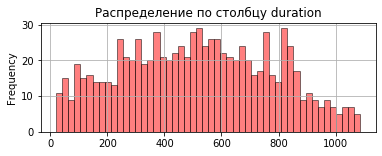

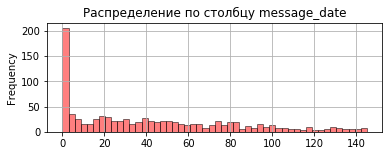

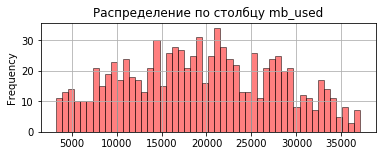

In [15]:
print('Распределение минут, сообщений и интернет-трафика по тарифу "Ультра"')
amount_list = ['duration', 'message_date', 'mb_used']
for i in amount_list:
    my_hist(ultra, i)
    


Распределение минут, сообщений и интернет-трафика по тарифу "Смарт"


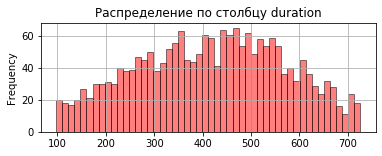

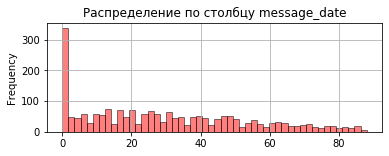

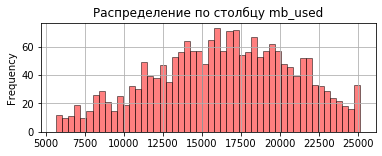

In [16]:
print('Распределение минут, сообщений и интернет-трафика по тарифу "Смарт"')
amount_list = ['duration', 'message_date', 'mb_used']
for i in amount_list:
    my_hist(smart, i)
    

In [17]:
#теперь посчитаем среднее, дисперсию и стандартное отклонение
print('Среднее количество минут разговора, дисперсия и стандартное отклонение по двум тарифам')
revenue.groupby('tariff').agg({'duration': ['mean', 'std', 'var']})

Среднее количество минут разговора, дисперсия и стандартное отклонение по двум тарифам


duration                           
              mean         std            var
tariff                                       
smart   417.934948  190.313730   36219.315784
ultra   526.623350  317.606098  100873.633397

In [18]:
print('Среднее количество сообщений, дисперсия и стандартное отклонение по двум тарифам')
revenue.groupby('tariff').agg({'message_date': ['mean', 'std', 'var']})

Среднее количество сообщений, дисперсия и стандартное отклонение по двум тарифам


message_date                        
               mean        std          var
tariff                                     
smart     33.384029  28.227876   796.812958
ultra     49.363452  47.804457  2285.266143

In [19]:
print('Среднее количество интернет-трафика, дисперсия и стандартное отклонение по двум тарифам')
revenue.groupby('tariff').agg({'mb_used': ['mean', 'std', 'var']})

Среднее количество интернет-трафика, дисперсия и стандартное отклонение по двум тарифам


mb_used                            
                mean           std           var
tariff                                          
smart   16229.188425   5877.576978  3.454591e+07
ultra   19486.901523  10096.317202  1.019356e+08

**Распределения минут и трафика по тарифу "Смарт" ближе к нормальному, в тарифе "Ультра" больше выбросов. По сообщениям картина весьма предсказуемая: мало кто использует SMS при наличии мессенджеров.**

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>Когда исправишь в первом пункте обработку аномальных значений, найденных на гистограмме, поправь, пожалуйста выводы при необходимости :) </s>
    
    
Согласна с твоими выводами, но все же, если мы говорим про выбросы, то для этого нужно строить боксплоты и на них смотреть выбросы. Гистограммы выглядят так из-за того, что мы взяли большое количество корзин. 
    
Круто, кстати, что не забыла посчитать дисперсии! 
</div>

<div class="alert alert-info"> нулевые выбросы я решила не удалять, так как они не повлияют на расчет прибыли от использования тарифов, а в гистограммах выше в функции прописала процентили, чтобы туда как раз-таки эти нули и не попали:(</div>


## Шаг 4. Проверьте гипотезы

Проверяем гипотезу "Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.
Соответственно формулируем нулевую и альтернативную гипотезы так, чтобы при отвержении нулевой гипотезы данные показывали бы нам, что средняя выручка между тарифам не равна.

H0 - средняя выручка тарифов одинакова
H1 - средняя выручка тарифов не одинакова

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Гипотезы сформулированы верно.</div>

In [20]:
#устанавливаем пороговое значение
alpha = 0.05

#проверять равенство средних будем с помощью ttest
results = st.ttest_ind(ultra['proceeds'], smart['proceeds'],equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711368788e-296
Отвергаем нулевую гипотезу


**Средняя выручка пользователей тарифов различается.**

Проверяем гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей других регионов.
H0 - средняя выручка пользователей из Москвы и регионов одинакова H1 - средняя выручка  пользователей из Москвы и регионов не одинакова

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Согласна !</div>

*В таком случае, целесообразно сравнить среднюю выручку по тарифам*

In [21]:
revenue.groupby('tariff').agg({'proceeds': ['mean']})

,proceeds
,mean
tariff,
smart,1233.349467
ultra,2060.529971


**Исходя из полученных показателей, можно сделать вывод, что в тарифе "Ультра" выручка выше.**

In [22]:
#разделим на выборки по Москве и регионам
moscow = revenue.query('city == "Москва"')
region = revenue.query('city != "Москва"')

In [23]:
#устанавливаем пороговое значение
alpha = 0.05

#проверять равенство средних будем с помощью ttest
results = st.ttest_ind(moscow['proceeds'], region['proceeds'],equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


**Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей в регионах.**
*неожиданно*

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Т-тест проведен корректно. Молодец!  В этом пункте также стоит отдельно выделить гипотезы, которые будем проверять .</div>

## Шаг 5. Напишите общий вывод

Итак, результаты t-теста показали, что средние выручки по тарифам все-таки различаются. Мы проверили среднее значение выручки и выяснили, что выгоднее (для оператора, конечно же) - тариф "Ультра". Он дороже по размеру абонентской платы в 3,5 раза, предоставляет пакеты минут, сообщений и трафика в разы больлше, а исходя из средних значений выручки мало кто из пользователей тарифа "Ультра" выходит за рамки "пакета".
Также мы выяснили, что на обоих тарифах не пользуются популярностью SMS, так что вполне адекватным решением было бы сократить количество SMS в пакете тарифа "Ультра", а также количество минут - за пределы лимита в нашей выборке никто не вышел. Сократить их в пользу, например, интернет-трафика: пользователи выходят даже за такой размер пакета как 30гб.

**обновление после ревью**
*В общем, выгоднее все-таки продвигать тариф "Ультра", но я бы также посоветовала чуть скорректировать пакеты, включенные в тариф, исходя из анализа и предыдущих выводов*

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>Очень хорошие выводы. Здорово, что отметила, что смски уже устарели как вид связи. Здесь еще очень важно ответить на вопрос, какой тариф для компании Мегалайн выгоднее продвигать? Правильного ответа нет, очень важны твои рассуждения как аналитика:) </s>

Интересная рекомендация! Здесь важно сделать одну важную оговорку :) Если скорректировать лимиты по тарифу Ультра или ввести возможность менять нерастраченные смски на мегабайты, то это будет идеальный тариф... для клиента. А нам важно повысить прибыль самой компании. Важно найти этот баланс, чтобы и тарифы были выгодные, и клиенты довольны, и компания на этом зарабатывала. Мы как аналитики сейчас выступаем не в роли потребителей, а даем советы компании как разбогатеть. Однако, в данном вопросе нет правильного ответа и было важно услышать именно твоё мнение. Возможно "честный" и максимально клиентоориентированный подход привлечет много новых пользователей и прибыль вырастет, почему нет :)
</div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> 
<b>Общий вывод по проекту:</b>
    
<s>У тебя получилась очень хорошая работа. Ты  продемонстрировала правильное использование методов pandas для работы с датафреймами, умение группировать данные и автоматизировать этот процесс, грамотное тестирование гипотез. Отлично, так держать! Для принятия проекта его осталось совсем чуть-чуть доработать.

Критично исправить:

- добавить проверку на наличие дубликатов,
- добавить округление для интернет-сессий,
- построить гистограммы, описать аномальные наблюдения и обработать их,
- обновить выводы
- ответить на вопрос, какой тариф выгоднее продвигать.
    
    
Жду твою работу на повторное ревью, обещаю, что оно не займет много времени :) </s>
    
    
    
</div>

<div class="alert alert-info"> Спасибо большое за ревью! Некоторые вещи я действительно просто забыла сделать, спасибо за терпеливое отношение. По поводу этих злополучных нулей: раз мы оставили только те нули, которые ничего не стоят, соответственно, не повлияют на расчет прибыли, я решила от них не избавляться. В любом случае, такие "аномалии" будут всегда при использовании сотовой связи. Что в универе при работе со статистикой, что в Практикуме, я уяснила, что если нули несут в себе конкретно нулевое значение (а не пропуск или случайное число), то это тоже ценные данные для анализа:)
Могу быть не права, и если в данной работе обработка нулей необходима - сделаю. Был еще вариант заменить нули на единички, но это грубое искажение данных ИМХО:)</div>


<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> 
 
Я рада, если мои комментарии оказались полезными. В своей работе ты максимально подробно изучаешь исходные данные и обдумываешь, как лучше сделать обработку. Это очень важно. Статистические методы и критерии можно выучить, но куда важнее научиться видеть, когда и что применять. Поэтому твой подход к решению самый правильный. 
    
По поводу нулей. Как я уже сказала, нам важно было посмотреть на распределения, с которыми мы будем работать. Здесь в датасете у нас относительно все хорошо, но нам могут встретиться неполные данные и тогда прогнозы и анализ делать некорректно, надо думать, как обрабатывать (это был спойлер к одному будущему проекту :). Мы оставили нули, так как посчитали, что это недозвоны и неудачные попытки войти в интернет, в сводной таблице эти нули в сумме ни на что не повлияют. Решение абсолютно логично.
    
Но заменить все нули на единички тоже можно. Это просто другой подход. Если бы мы узнали, что оператор начинает засекать разговоры не с первой минуты, а со второй, чтобы как раз таки отсечь все такие недозвоны, то здесь нули это звонки чуть больше минуты и их уже нужно не отбрасывать, а округлять.

</div>